#Dog and cat classifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cats_and_dogs_filtered.zip to cats_and_dogs_filtered (1).zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
print(os.listdir('/root/.keras/datasets/'))

['cats_and_dogs_filtered.zip', 'cats_and_dogs_filtered_extracted']


In [ ]:
import zipfile
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_file = tf.keras.utils.get_file('cats_and_dogs_filtered.zip' , origin = url , extract = True)
base_dir = os.path.join(os.path.dirname(zip_file) , 'cats_and_dogs_filtered_extracted', 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir , 'dogs')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datgen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir , target_size = (150 , 150) ,
    batch_size = 20 , class_mode = 'binary')

validation_generator = validation_datgen.flow_from_directory(
    validation_dir , target_size = (150 , 150) ,
    batch_size = 20 , class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print("Base directory:", base_dir)
print("Contents of base directory:", os.listdir(base_dir))
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))

Base directory: /root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered
Contents of base directory: ['train', 'validation', 'vectorize.py']
Train directory exists: True
Validation directory exists: True


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (150 , 150 , 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
history= model.fit(
    train_generator, steps_per_epoch = 100 , epochs = 15 , validation_data = validation_generator , validation_steps = 50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.5140 - loss: 0.8544 - val_accuracy: 0.5820 - val_loss: 0.6739
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5985 - loss: 0.6600 - val_accuracy: 0.6480 - val_loss: 0.6099
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6719 - loss: 0.6090 - val_accuracy: 0.6440 - val_loss: 0.6377
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6989 - loss: 0.5771 - val_accuracy: 0.6630 - val_loss: 0.6209
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7694 - loss: 0.4788 - val_accuracy: 0.6860 - val_loss: 0.6322
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8396 - loss: 0.3646 - val_accuracy: 0.6880 - val_loss: 0.6785
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8885 - loss: 0.2658 - val_accuracy: 0.6720 - val_loss: 0.9520
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9378 - loss: 0.1647 - val_accu

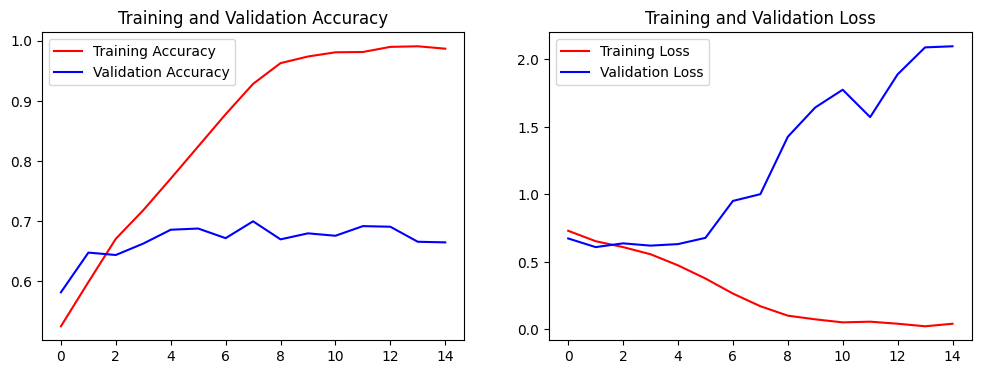

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochs , acc , 'r' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'b' , label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs , loss , 'r' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = tf.keras.utils.get_file('dog.jpg', 'https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg'
)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))         # Resize
img_array = image.img_to_array(img) / 255.0                     # Normalize
img_array = tf.expand_dims(img_array, axis=0)                   # Add batch dimension

# Make prediction
predictions = model.predict(img_array)
print(predictions)

# Interpret result
if predictions[0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.97127473]]
Dog


#Horse human classifier

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import zipfile
import os
zip_path = "horse-or-human.zip"
extract_path = "/content/horse-or-human"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)